In [2]:
# Loading the dataset 
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
# Looking at the shape of the data
print(X_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.shape)
print(y_train_full.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


In [5]:
# Splitting into a traning set and a validation set and scaling down the data set 
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
# Creating the list of class names 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [7]:
# Defining the model 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the model to scpecify the loss function and the optimizer to use 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# spare_categorical_crossentropy is used for sparse labels (from 0 to 9)
# categorical_crossentropy is used for one-hot vectors (one target probability per class for each instance)


In [9]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7134 - accuracy: 0.7662 - val_loss: 0.5101 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8281 - val_loss: 0.4541 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4455 - accuracy: 0.8438 - val_loss: 0.4174 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4174 - accuracy: 0.8539 - val_loss: 0.4159 - val_accuracy: 0.8502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3976 - accuracy: 0.8610 - val_loss: 0.3894 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3815 - accuracy: 0.8656 - val_loss: 0.3810 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3666 - accuracy: 0.8693 - val_loss: 0.3867 - val_accuracy:

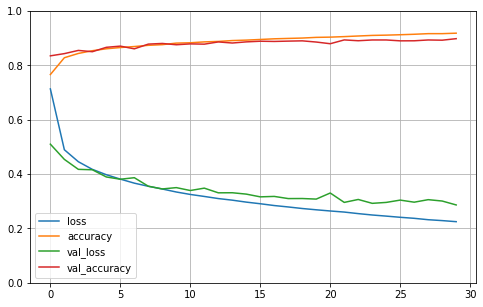

In [12]:
# Plotting training performance  
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [13]:
# Evaluating the model with the test set
model.evaluate(X_test, y_test)



313/313 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8837


[0.3238764703273773, 0.8837000131607056]

In [14]:
# Predicting 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)



array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
# Showing the classes 
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

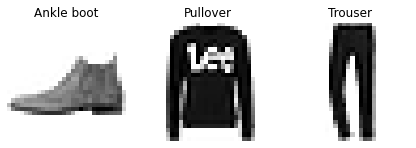

In [21]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()